# Import

In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Load & Inspect
### Understanding the data

In [25]:
data = pd.read_csv('StudentPerformanceFactors.csv')

In [26]:
print(data.head())
print(data.info())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

## Missing Values

In [27]:
missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]

if not columns_with_missing_values.empty:
    print("Features with missing data:")
    print(columns_with_missing_values)
else:
    print("There are no features with missing data.")

Features with missing data:
Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


## Percentage null

In [28]:
# Select non-numerical columns
non_numerical_features = data.select_dtypes(exclude=[np.number])

# Select numerical columns
numerical_features = data.select_dtypes(include=[np.number])

# Calculate percentage of null values in non-numerical features
null_percentages = non_numerical_features.isnull().mean() * 100

# Print the percentage of null values for each non-numerical feature
print("Percentage of null values in non-numerical features before cleaning:")
for feature, percentage in null_percentages.items():
    print(f"{feature}: {percentage:.2f}%")

# Calculate percentage of zeros in numerical features
zero_percentages = (numerical_features == 0).mean() * 100

# Print the percentage of zeros for each numerical feature
print("\nPercentage of zeros in numerical features before cleaning:")
for feature, percentage in zero_percentages.items():
    print(f"{feature}: {percentage:.2f}%")


Percentage of null values in non-numerical features before cleaning:
Parental_Involvement: 0.00%
Access_to_Resources: 0.00%
Extracurricular_Activities: 0.00%
Motivation_Level: 0.00%
Internet_Access: 0.00%
Family_Income: 0.00%
Teacher_Quality: 1.18%
School_Type: 0.00%
Peer_Influence: 0.00%
Learning_Disabilities: 0.00%
Parental_Education_Level: 1.36%
Distance_from_Home: 1.01%
Gender: 0.00%

Percentage of zeros in numerical features before cleaning:
Hours_Studied: 0.00%
Attendance: 0.00%
Sleep_Hours: 0.00%
Previous_Scores: 0.00%
Tutoring_Sessions: 22.90%
Physical_Activity: 0.70%
Exam_Score: 0.00%


## Duplicates

In [29]:
num_duplicates_before = data.duplicated().sum()
print("Number of duplicate rows before removal:", num_duplicates_before)

Number of duplicate rows before removal: 0


## Numerical features range

In [30]:
for col in numerical_features.columns:
    print(f"Range of values for column '{col}': {data[col].min()} to {data[col].max()}")

Range of values for column 'Hours_Studied': 1 to 44
Range of values for column 'Attendance': 60 to 100
Range of values for column 'Sleep_Hours': 4 to 10
Range of values for column 'Previous_Scores': 50 to 100
Range of values for column 'Tutoring_Sessions': 0 to 8
Range of values for column 'Physical_Activity': 0 to 6
Range of values for column 'Exam_Score': 55 to 101


## Categorical Features unique values

In [31]:
# Count unique values for all non-numerical features
unique_counts = non_numerical_features.apply(lambda x: x.nunique())

# Print the results
print("Number of unique values for each non-numerical feature:")
for feature, count in unique_counts.items():
    print(f"{feature}: {count} unique values")
#print the unique values for each non-numerical feature
for feature in non_numerical_features.columns:
    unique_values = non_numerical_features[feature].unique()
    print(f"Unique values for feature '{feature}': {unique_values}")

Number of unique values for each non-numerical feature:
Parental_Involvement: 3 unique values
Access_to_Resources: 3 unique values
Extracurricular_Activities: 2 unique values
Motivation_Level: 3 unique values
Internet_Access: 2 unique values
Family_Income: 3 unique values
Teacher_Quality: 3 unique values
School_Type: 2 unique values
Peer_Influence: 3 unique values
Learning_Disabilities: 2 unique values
Parental_Education_Level: 3 unique values
Distance_from_Home: 3 unique values
Gender: 2 unique values
Unique values for feature 'Parental_Involvement': ['Low' 'Medium' 'High']
Unique values for feature 'Access_to_Resources': ['High' 'Medium' 'Low']
Unique values for feature 'Extracurricular_Activities': ['No' 'Yes']
Unique values for feature 'Motivation_Level': ['Low' 'Medium' 'High']
Unique values for feature 'Internet_Access': ['Yes' 'No']
Unique values for feature 'Family_Income': ['Low' 'Medium' 'High']
Unique values for feature 'Teacher_Quality': ['Medium' 'High' 'Low' nan]
Unique v

# Data Cleaning

## Numerical Features 

In [32]:
#Scale numerical features with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_features.columns] = scaler.fit_transform(data[numerical_features.columns])

## Categorical Features

In [33]:
for col in non_numerical_features:
    # if the column's values are yes/no convert to 1/0
    if data[col].dropna().isin(['Yes', 'No']).all():
        data[col] = data[col].map({'Yes': 1, 'No': 0})
    else:
        # one-hot-encoding
        data[col] = data[col].fillna('NULL').str.split(',').apply(lambda x: [item.strip() for item in x])
        mlb = MultiLabelBinarizer()
        status_encoded = mlb.fit_transform(data[col])
        encoded_df = pd.DataFrame(status_encoded, columns=mlb.classes_)
        encoded_df.columns = [f'{col}_{c}' for c in encoded_df.columns]
        data = pd.concat([data, encoded_df], axis=1)
        # dropping the original column
        data = data.drop(col, axis=1)
#drop column name has NULL in it
data = data[data.columns.drop(list(data.filter(regex='NULL')))]

In [34]:
print(data.head())
print(data.info())

   Hours_Studied  Attendance  Extracurricular_Activities  Sleep_Hours  \
0       0.504942    0.348375                           0    -0.019796   
1      -0.162822   -1.383736                           0     0.661399   
2       0.671882    1.560853                           1    -0.019796   
3       1.506587    0.781403                           1     0.661399   
4      -0.162822    1.041220                           1    -0.700990   

   Previous_Scores  Internet_Access  Tutoring_Sessions  Physical_Activity  \
0        -0.143800                1          -1.213934           0.031411   
1        -1.116110                1           0.411451           1.001199   
2         1.106313                1           0.411451           1.001199   
3         1.592469                1          -0.401242           1.001199   
4        -0.699406                1           1.224144           1.001199   

   Learning_Disabilities  Exam_Score  ...  Peer_Influence_Neutral  \
0                      0   -0

# Vizualization

## Correlation analysis

Correlation of features with 'Exam_Score':
Exam_Score                               1.000000
Attendance                               0.581072
Hours_Studied                            0.445455
Previous_Scores                          0.175079
Tutoring_Sessions                        0.156525
Access_to_Resources_High                 0.143766
Parental_Involvement_High                0.140396
Parental_Education_Level_Postgraduate    0.093764
Distance_from_Home_Near                  0.084870
Peer_Influence_Positive                  0.081217
Family_Income_High                       0.076046
Teacher_Quality_High                     0.073322
Extracurricular_Activities               0.064382
Motivation_Level_High                    0.060168
Internet_Access                          0.051475
Physical_Activity                        0.027824
Motivation_Level_Medium                  0.024771
Family_Income_Medium                     0.020995
Parental_Education_Level_College         0.013509
School_

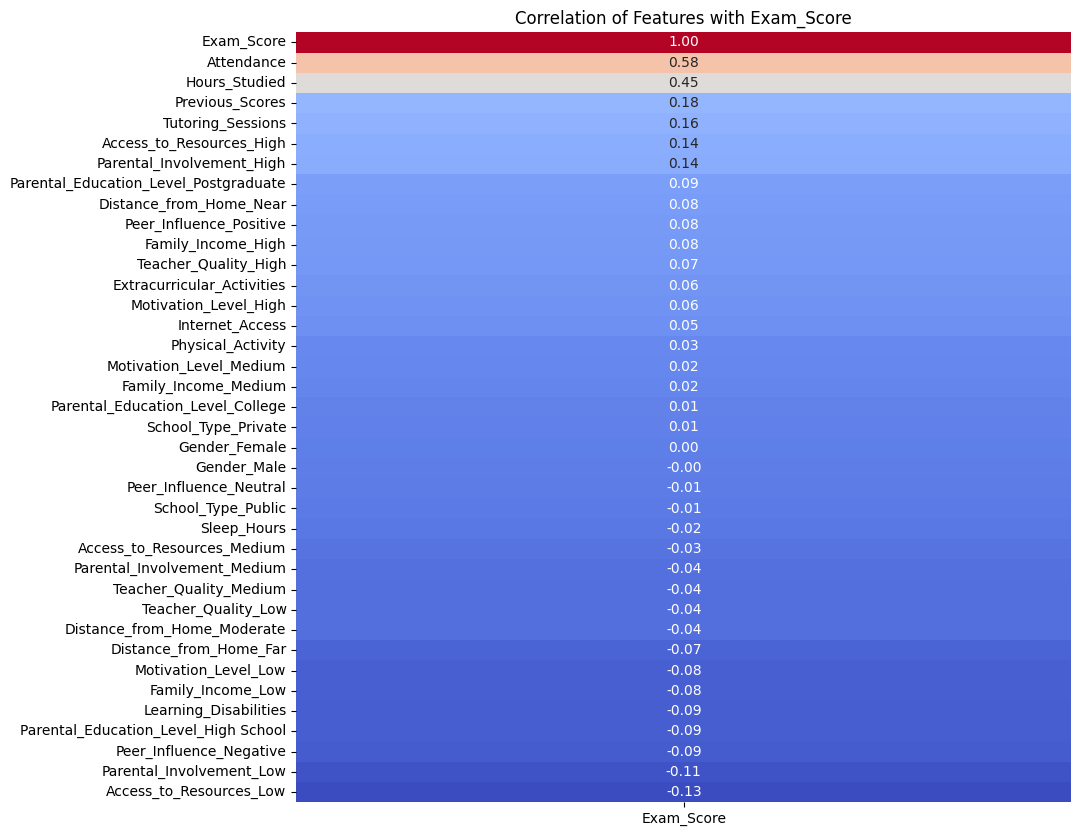

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation analysis with label column 'Exam_Score'
correlation_matrix = data.corr(numeric_only=True)

correlation_with_label = correlation_matrix['Exam_Score'].sort_values(ascending=False)
print("Correlation of features with 'Exam_Score':")
print(correlation_with_label)
plt.figure(figsize=(10, 10))
sns.heatmap(
    correlation_with_label.to_frame(),
    annot=True, fmt=".2f", cmap="coolwarm",
    cbar=False
)
plt.title("Correlation of Features with Exam_Score")
plt.show()


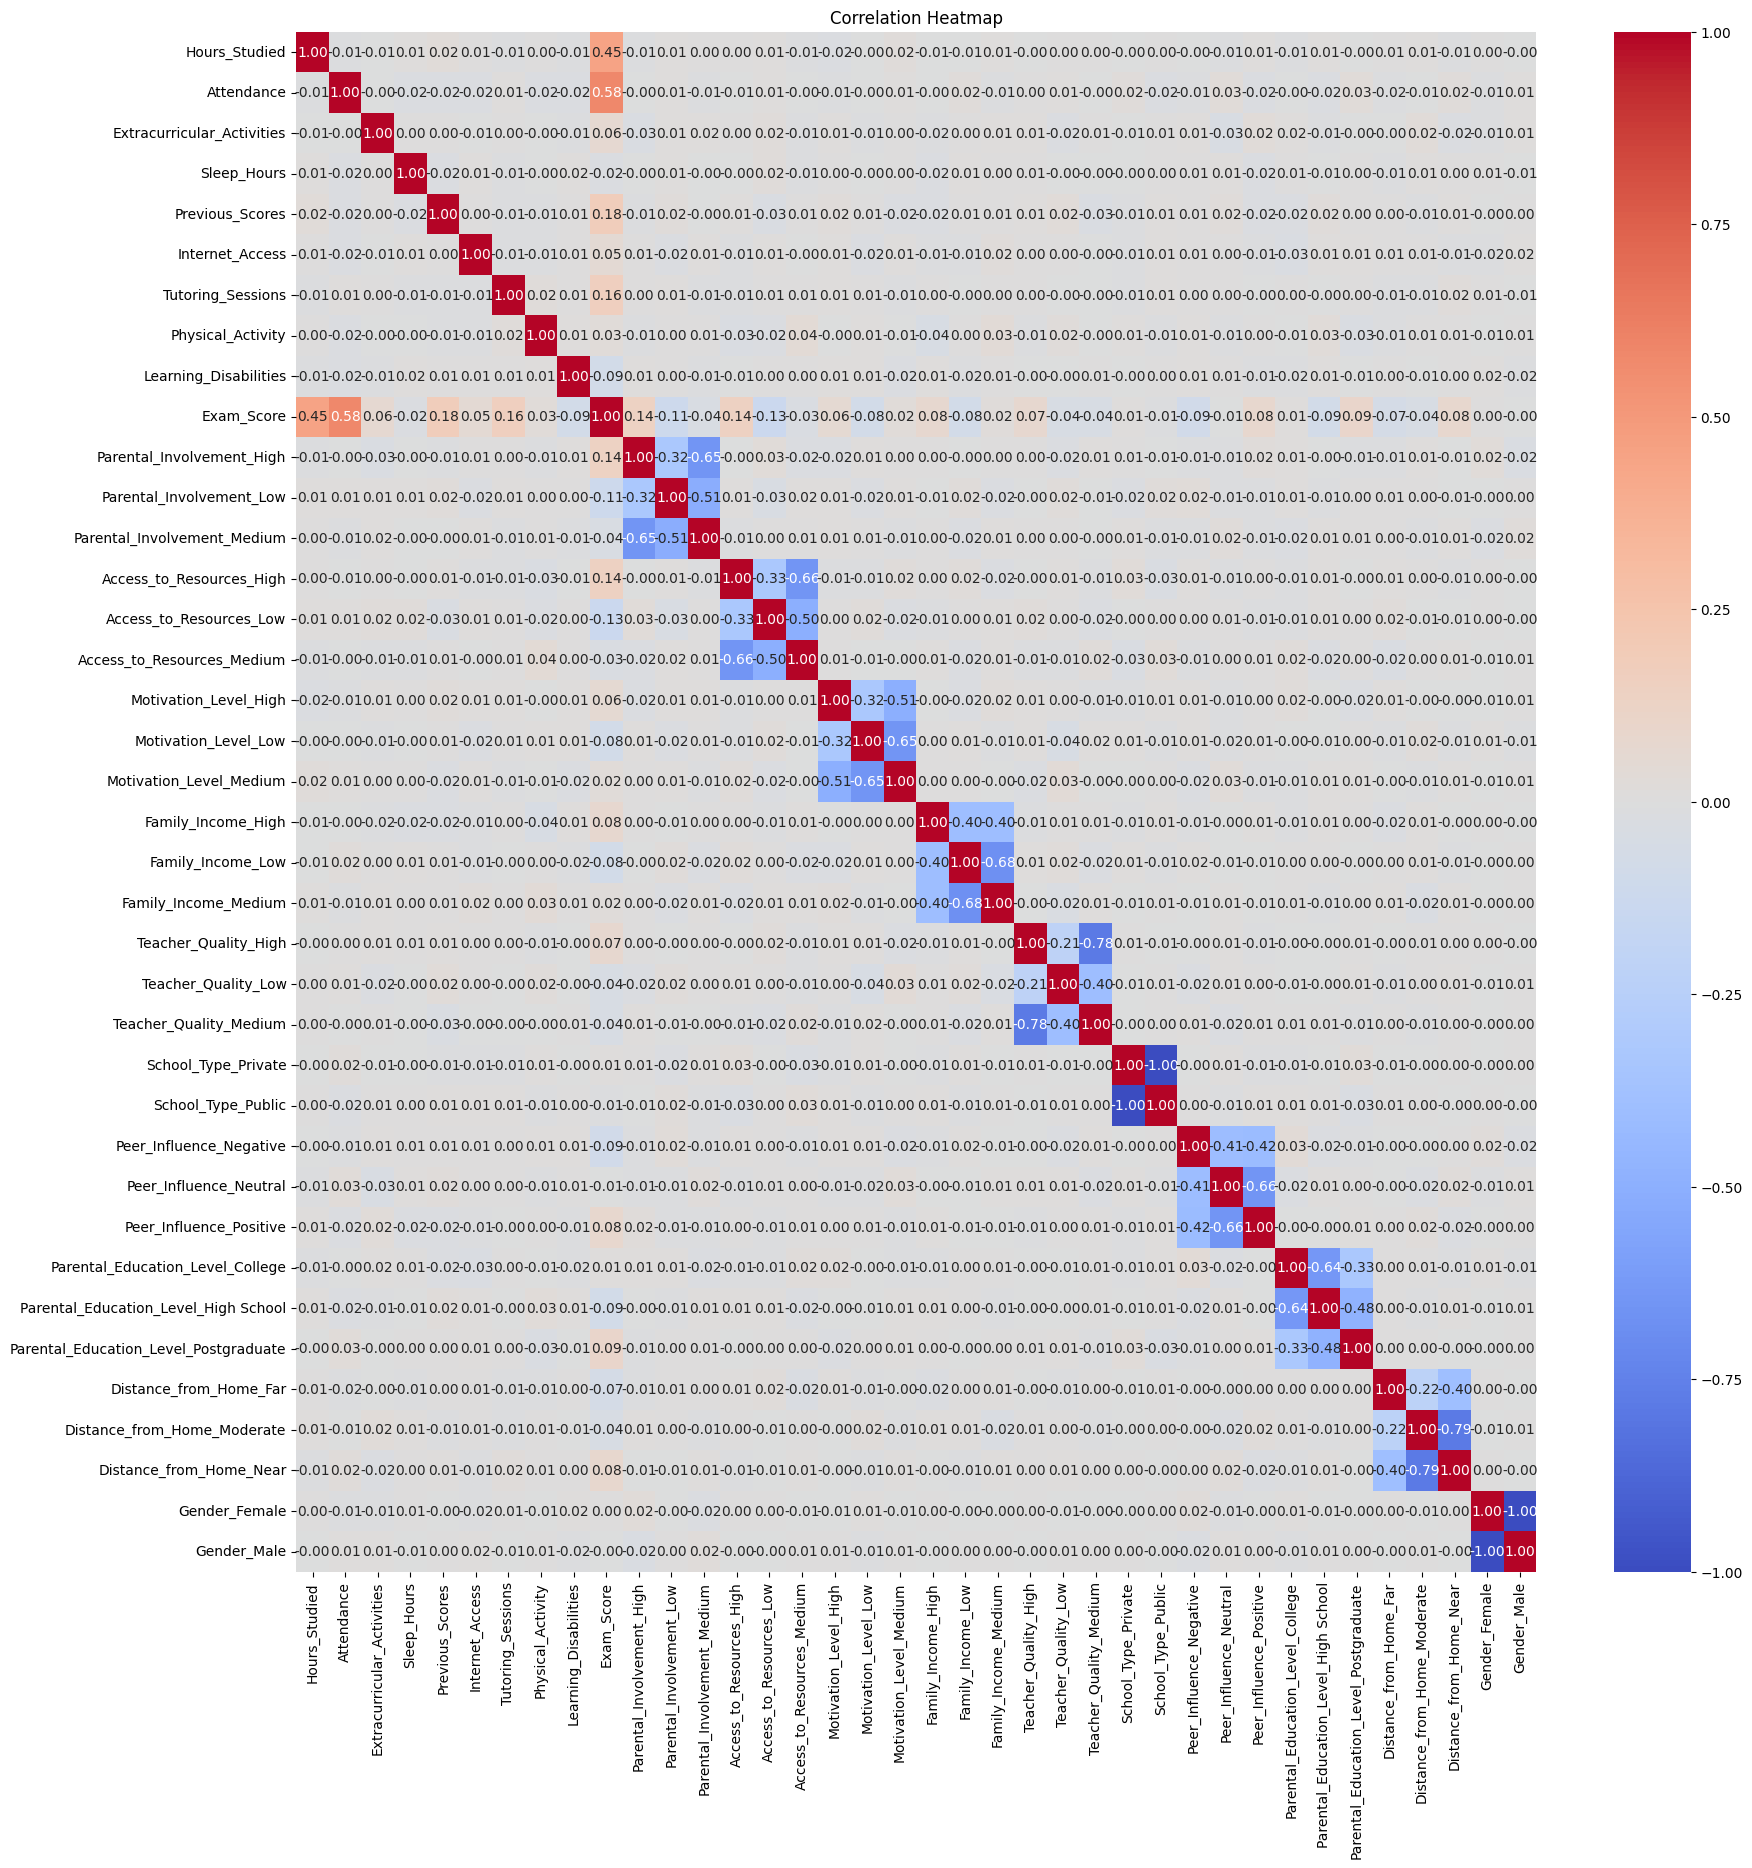

In [76]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

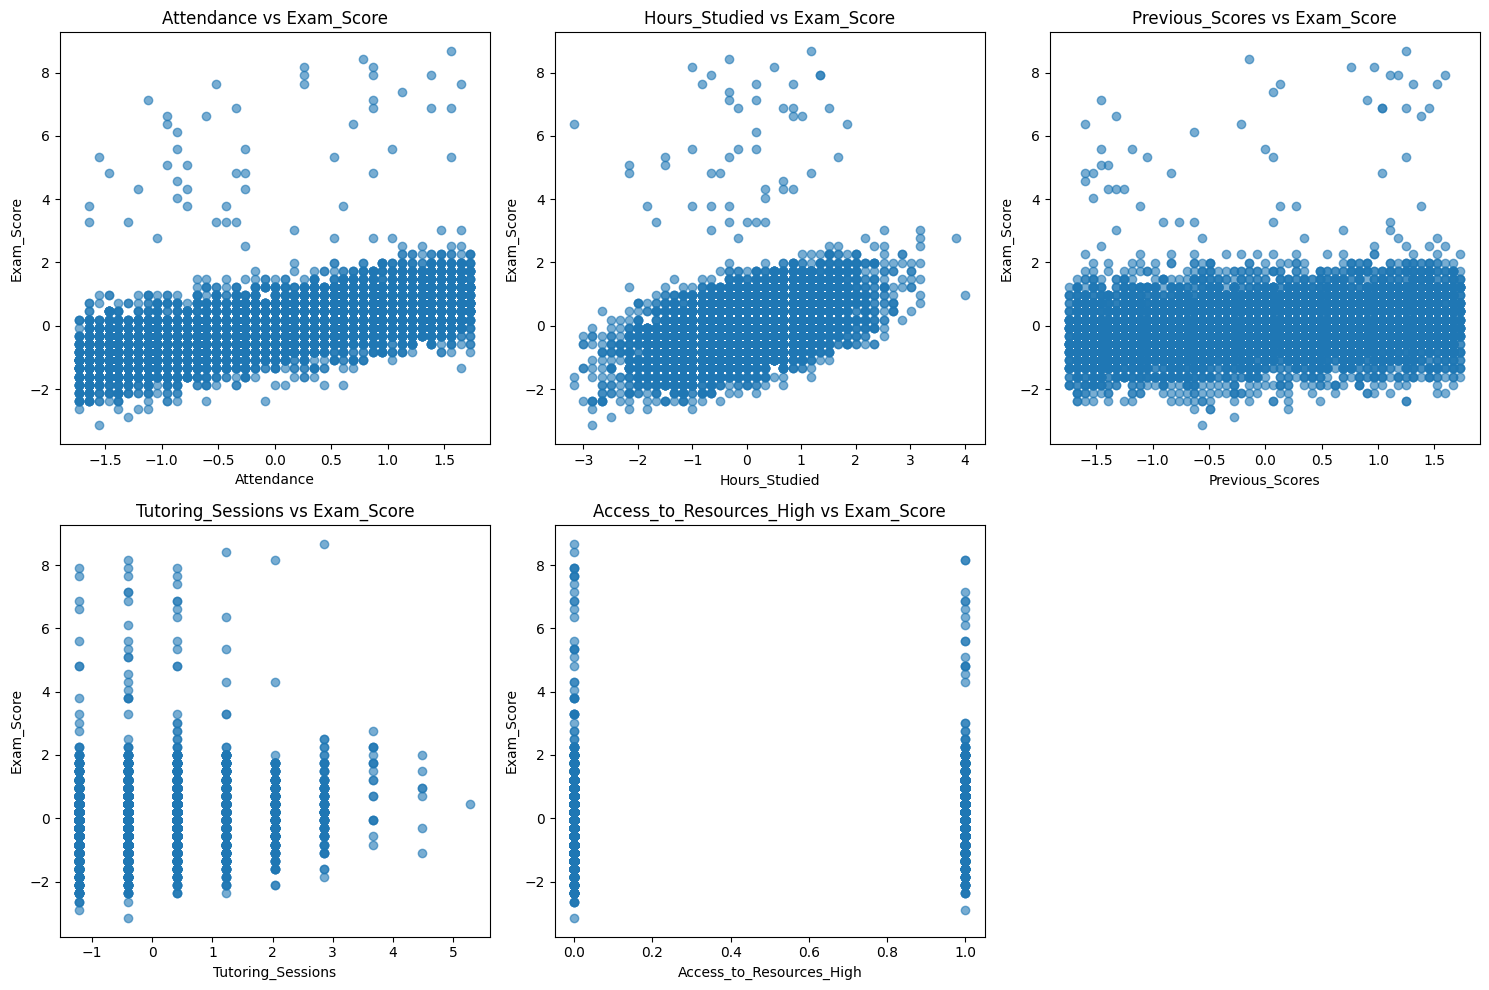

Index(['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions',
       'Access_to_Resources_High'],
      dtype='object')


In [77]:
# Plot only the top 5 features most correlated with Exam_Score
top_features = correlation_with_label.index[1:6]  # skip 'Exam_Score' itself

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(data[feature], data['Exam_Score'], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('Exam_Score')
    plt.title(f'{feature} vs Exam_Score')


plt.tight_layout()
plt.show()
print(top_features)

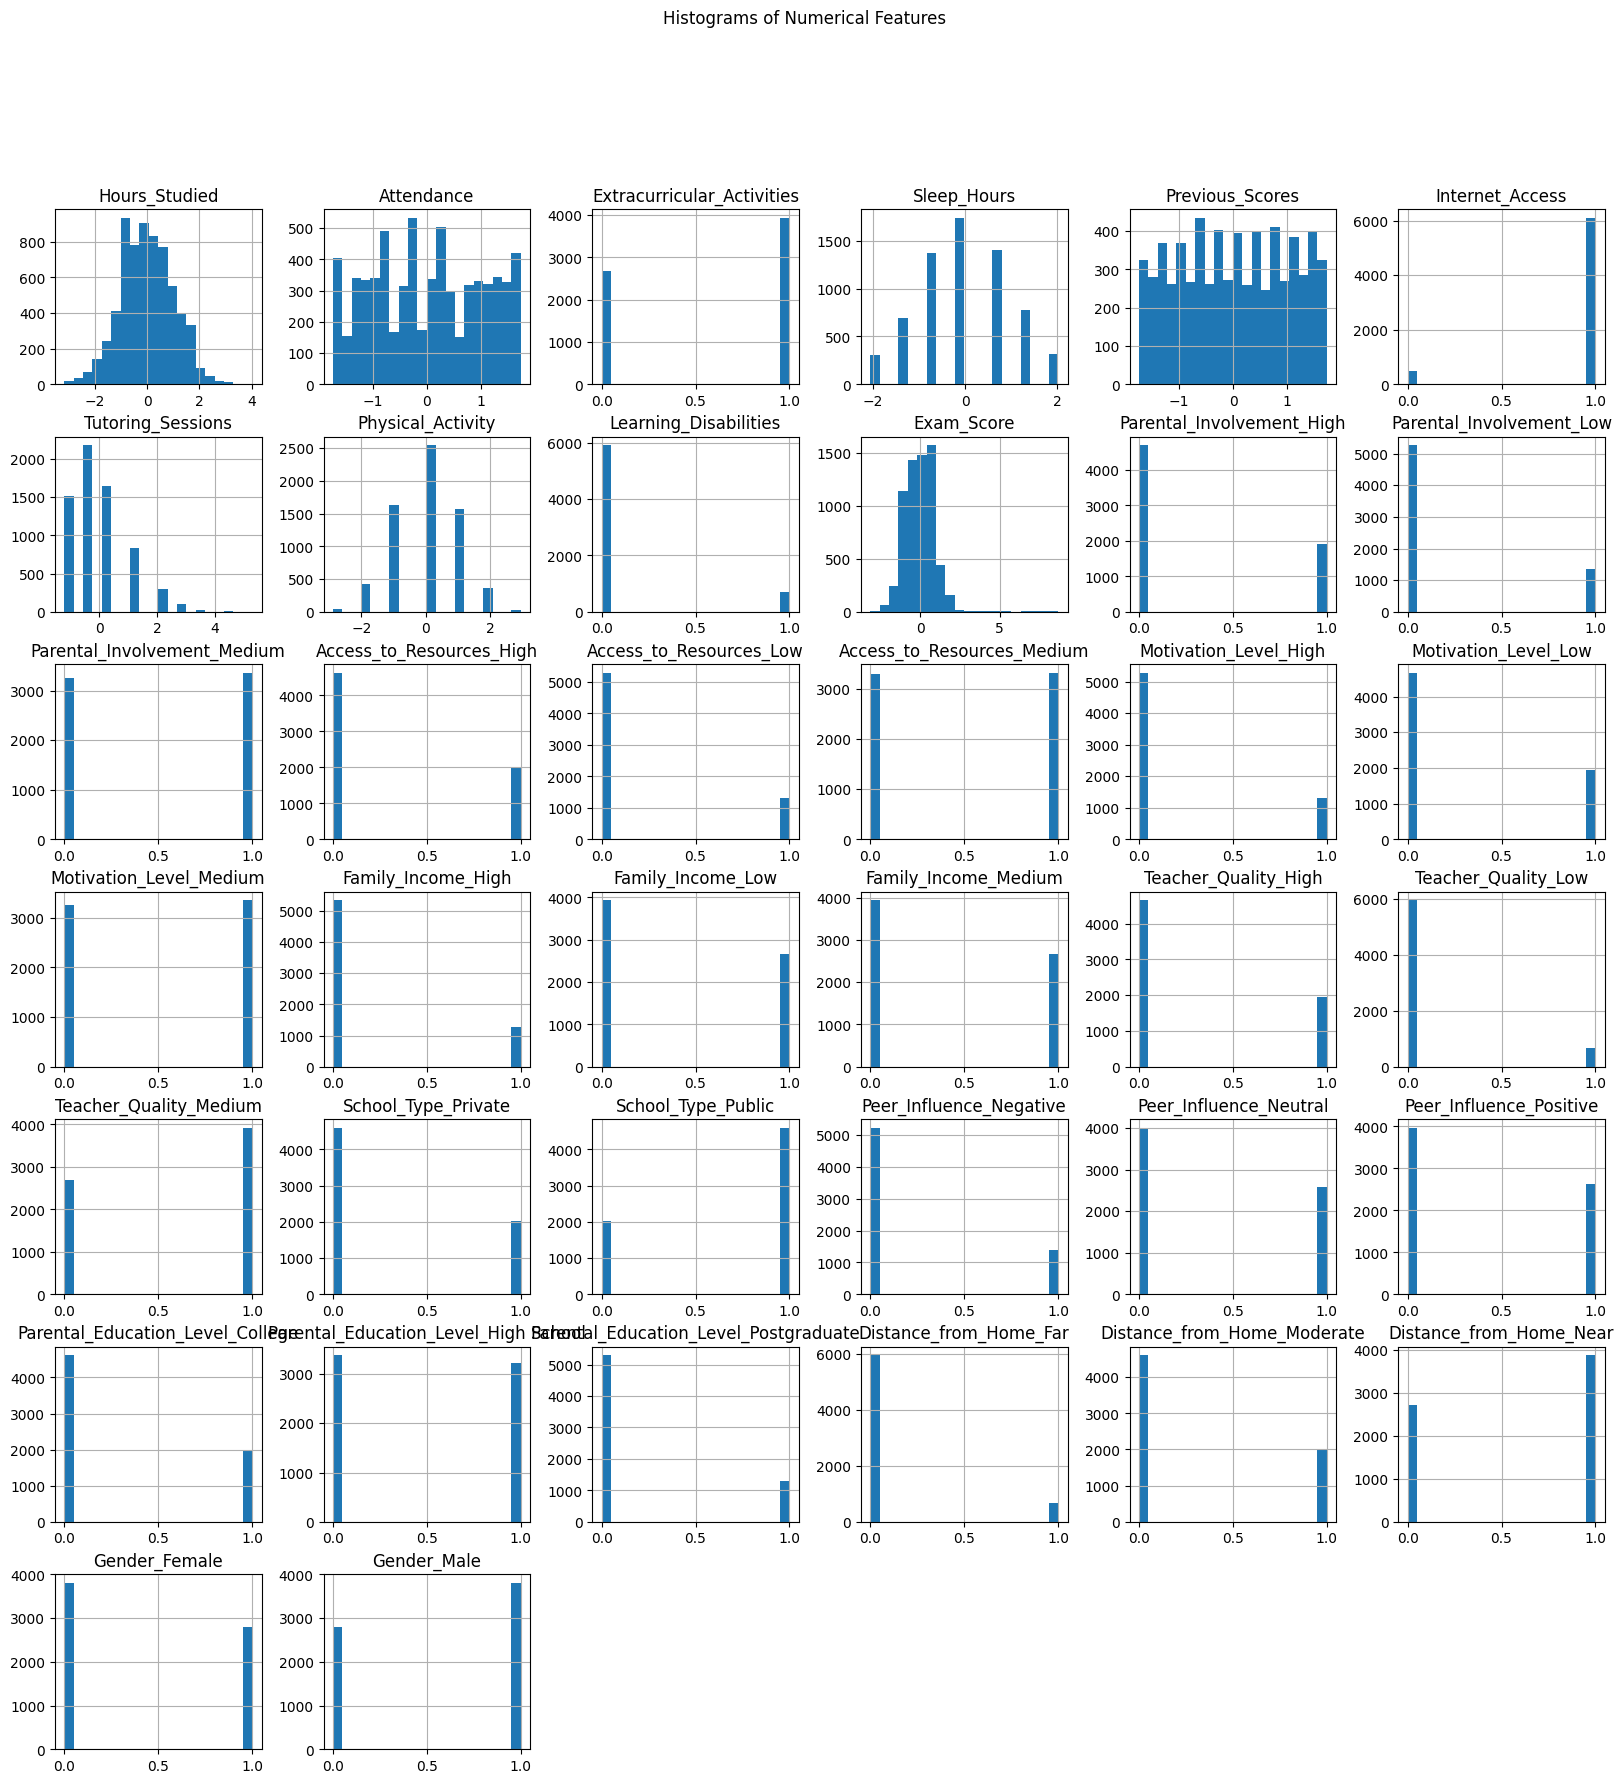

In [62]:
# Histograms
data.hist(bins=20, figsize=(20, 20))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Model Training
#### Linear Regression

In [ ]:
X = data[top_features]   # only use the top correlated features
y = data["Exam_Score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [79]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [80]:
# Predict
y_pred = model.predict(X_test)

# Evaluation

In [81]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

n = X_test.shape[0]   # number of samples
p = X_test.shape[1]   # number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("Adjusted R²:", adjusted_r2)


MAE: 0.29958542524463877
MSE: 0.3146663085593998
RMSE: 0.5609512532826715
R²: 0.6631105310037877
Adjusted R²: 0.6618305558176318


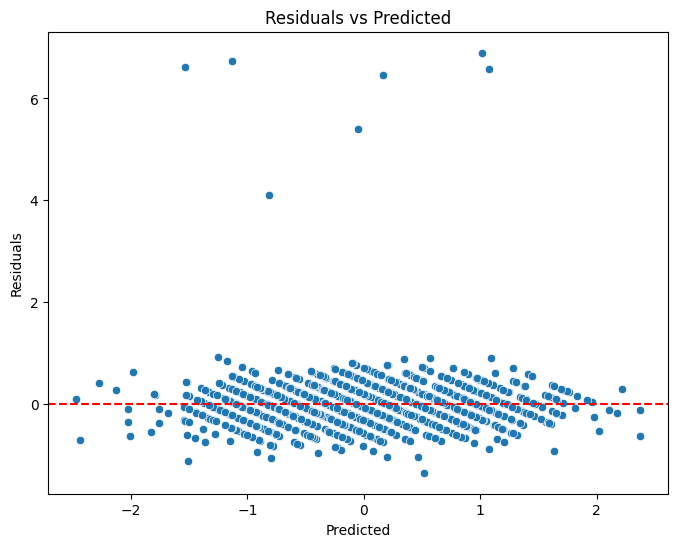

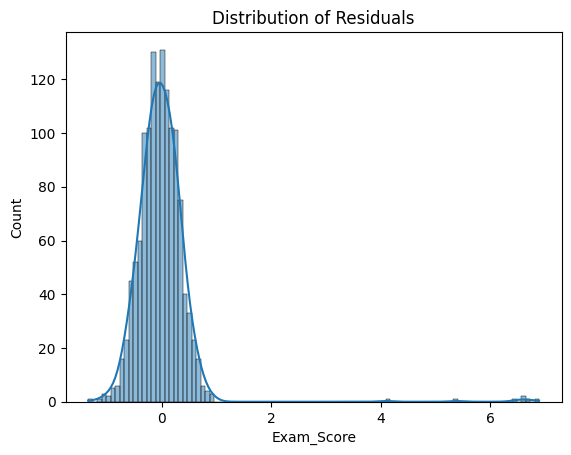

In [82]:
# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()


In [83]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", scores)
print("Mean R²:", scores.mean())


Cross-Validation R² Scores: [0.5335068  0.61719724 0.60908165 0.62447219 0.70946523]
Mean R²: 0.6187446219460557


# Bonus
#### Polynomial Regression

In [85]:
degree = 2  
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [86]:
y_pred_poly = poly_model.predict(X_test)

In [87]:
poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
poly_r2 = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression (degree = 2)")
print("RMSE:", poly_rmse)
print("R²:", poly_r2)


Polynomial Regression (degree = 2)
RMSE: 0.5622868219207224
R²: 0.6615044212519765


## Comparison

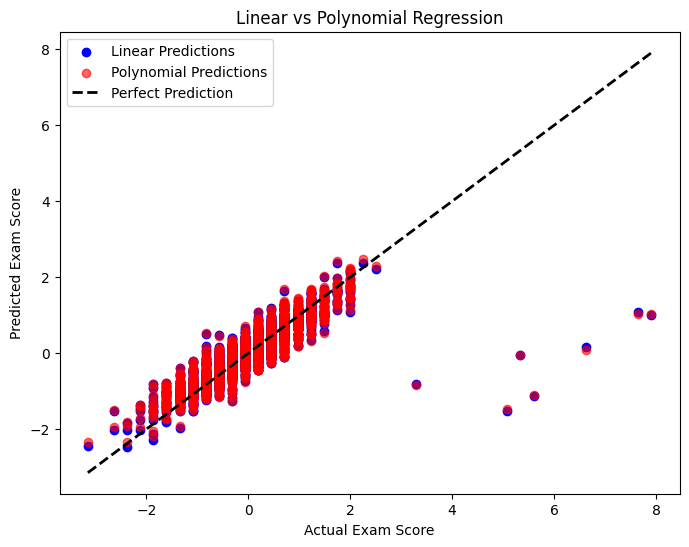

In [89]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", label="Linear Predictions")
plt.scatter(y_test, y_pred_poly, color="red", alpha=0.6, label="Polynomial Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         "k--", lw=2, label="Perfect Prediction")
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()